.

# Project: Investigating TMDB movie data and finding interesting insights and observations.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

INTRODUCTION
I am using the TMDB movie dataset, which contains around 10000+ movies, thier popularity, budget,revenue and other information. 

The two questions I will be exploring are:
1. The Average runtime of the movies
2. Movie release data and its profitability





In [122]:

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

After reviewing the dataset I have decided to delete unused data to make it easier to analysis the dataset
### General Properties

In [123]:

my_data = pd.read_csv('tmdb-movies.csv')
my_data.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [124]:
my_data.info()
my_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

Observations:
- For all the movies the vote_count is not the same, thus it is difficult to conclude the popularity of the movie using this. Also, the unit of currency is not stated in the dataset, so I will take it as US dollars (most widely used)

Data cleaning:
- Delete unused columns: id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.
- Remove any duplicate rows
- Movies that have zero budget or revenue will be discarded
- Replace zero in runtime column to NAN
- Changing release date into standard date format
- Reformating budget and revenue column






 #### 1. Removing Unused column
Delete: id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [125]:
delete=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

my_data = my_data.drop(delete,1)

my_data.head()



,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


#### 2. Removing duplicates

In [126]:
#Entries we have
rows, col = my_data.shape
print ( '{} total entries {} number of columns'.format(rows-1, col))

10865 total entries 10 number of columns


Remove duplicate rows.

In [127]:
my_data.drop_duplicates(keep ='first', inplace=True)
rows, col = my_data.shape

print ( '{} total entries {} number of columns'.format(rows-1, col))

10864 total entries 10 number of columns


#### 3. Removing zero from budget and revenue

In [128]:
zero=['budget', 'revenue']
my_data[zero] = my_data[zero].replace(0, np.NAN)
my_data.dropna(subset = zero, inplace = True)
rows, col = my_data.shape
print('We have {} number of movies left'.format(rows-1))

We have 3853 number of movies left


#### 4. Replacing zero with NAN in runtime

In [129]:
my_data['runtime'] =my_data['runtime'].replace(0, np.NAN)

#### 5. Changing release date into standard date format

In [130]:
my_data.release_date = pd.to_datetime(my_data['release_date'])
my_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


#### 6. Reformating budget and revenue column

In [131]:
#checking current format of column
my_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [132]:
#changing data type of budget and revenue to interger
changet=['budget', 'revenue']
my_data[changet]=my_data[changet].applymap(np.int64)
my_data.dtypes


budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: The Average runtime of the movies

In [133]:
def avgrun(column):
    return my_data[column].mean()
avgrun('runtime')


109.22029060716139

Average runtime of a movie was 109 minutes or 1 hour 49 minutes

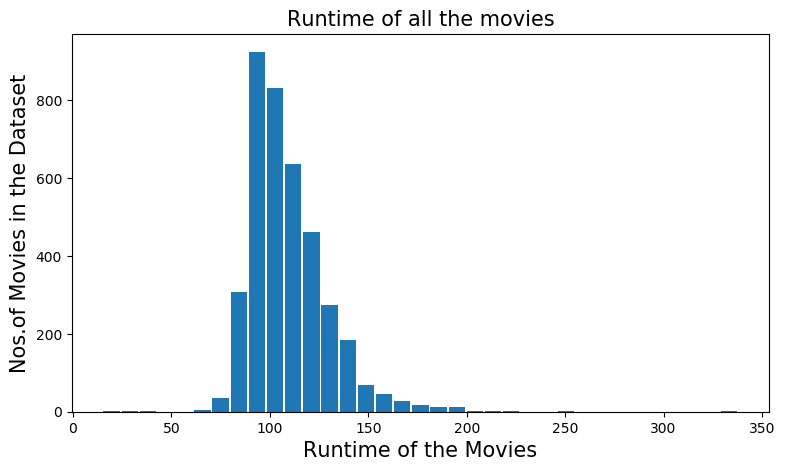

In [134]:
#histogram of runtime
plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('Runtime of the Movies', fontsize = 15)
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)


plt.hist(my_data['runtime'], rwidth = 0.9, bins =35)
plt.show()

Looking at the graph above we can see it is positively skewed. Majority of movies run for around 80 to 120 minutes.

For a better visualisation of the runtime we will be using a Data Point Plot next.

In [135]:
import seaborn as sns

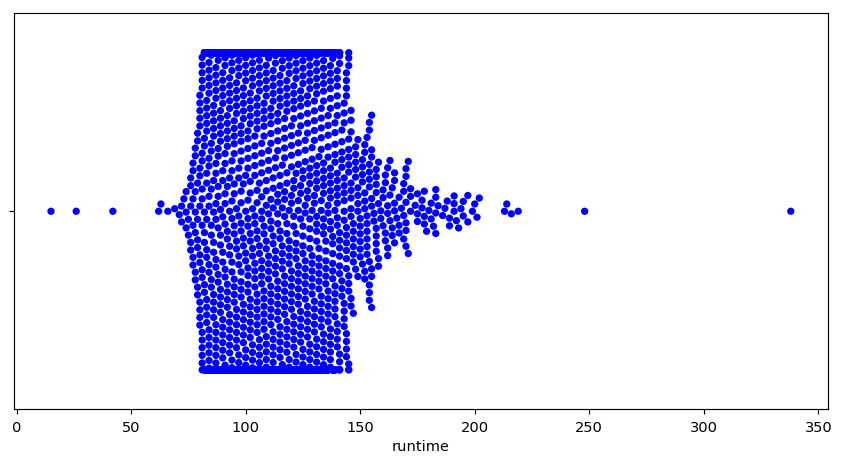

In [136]:
plt.figure(figsize=(10,5), dpi = 105)
sns.swarmplot(my_data['runtime'], color = 'blue')
plt.show()

In [137]:
#More information on runtime
my_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Looking at the plot we can clearly see where most runtime of movies are. There are a couple of outliers on either spectrum. Looking at the calculations as well the interquatile range for runtime were 95 minutes to 119 minutes, this is where the length of most movies are. 

### Research Question 2  Movie release data and its profitability

In [138]:
#Calculating profit of each movie
my_data.insert(2,'profitearned',my_data['revenue']-my_data['budget'])
my_data.head()

,budget,revenue,profitearned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


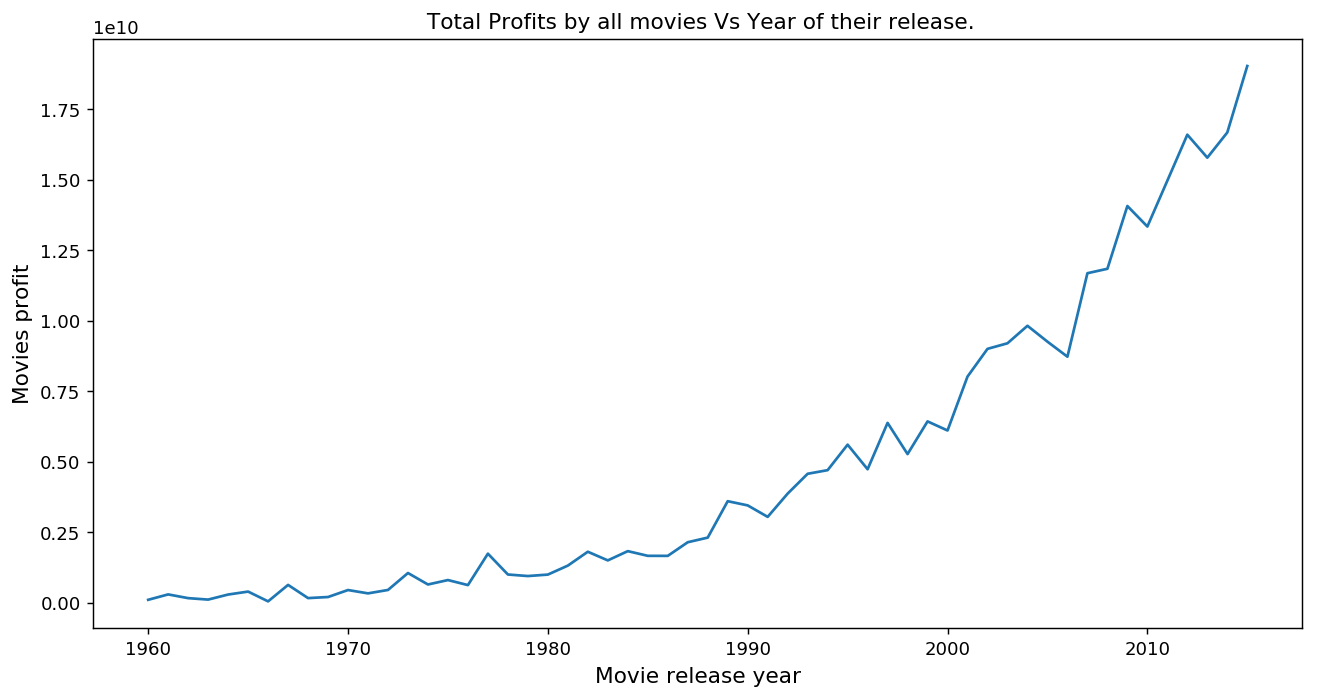

In [139]:
#Using a line plot for this analysis.
#Profit of movies for each year are summed up.
profitsy = my_data.groupby('release_year')['profitearned'].sum()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Movie release year', fontsize = 12)
plt.ylabel('Movies profit', fontsize = 12)

plt.title(' Total Profits by all movies Vs Year of their release.')

plt.plot(profitsy)
plt.show()



In [140]:
#Year with most profit
profitsy.idxmax()


2015

Looking at the graph we can safely say the latest movies realeased are also the most profitable.

<a id='conclusions'></a>
## Conclusions

  After going through these 2 research questions we can say that on average movies are normally between 95 minutes to 119 minutes, as there are many movies at this length it may be due to the fact people do not too long of a movie as they might lose interest. Also, shorter movies have lesser time to build a good story and that is why we have tv shows around that length of 30 minutes to 60 minutes. 
  Furthermore, from the release date and profit. We can see movies which have released later are more profitable, this may due to the fact that people in the past did not have many cinemas and no access to the internet thus, earlier released movies did not have a big market share. Although as we used all movies profits based on release date, another thing to keep in mind is there are many more movies made nowdays compared to the past which can skew the results. 
  Limitations
  We are not very sure if the data provided is accurate or up to date. Also, the currency was not provided for the budget and revenue column as we took it as US Dollar it might have been different currencies as well. Furthermore, this dataset has been reuploaded many times due to issues with copyright and plus the name changes so there is a very high chance some details have been changed or deleted that could have disturbed the analysis. 

In [141]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0